In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
docs=pd.read_table('SMSSpamCollection+(1)', header=None, names=['Class','sms'])

In [3]:
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [5]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [6]:
print('% spam is', (ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

% spam is 13.406317300789663


In [7]:
docs['label']=docs.Class.map({'ham':0,'spam':1})

In [8]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
x=docs.sms
y=docs.label

In [10]:
print(x.shape)
print(y.shape)

(5572,)
(5572,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1)

In [13]:
x_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vect=CountVectorizer(stop_words='english')

In [18]:
vect.fit(x_train)

CountVectorizer(stop_words='english')

In [19]:
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [20]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [21]:
x_train_transformed=vect.transform(x_train)
x_test_transformed=vect.transform(x_test)

In [22]:
from sklearn.naive_bayes import BernoulliNB

In [23]:
bnb=BernoulliNB()

In [26]:
bnb.fit(x_train_transformed, y_train)

BernoulliNB()

In [27]:
y_pred_class=bnb.predict(x_test_transformed)

In [28]:
y_pred_proba=bnb.predict_proba(x_test_transformed)

In [29]:
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_test, y_pred_class)

0.9770279971284996

In [33]:
bnb

BernoulliNB()

In [34]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]], dtype=int64)

In [35]:
confusion=metrics.confusion_matrix(y_test, y_pred_class)

In [36]:
print(confusion)

[[1207    1]
 [  31  154]]


In [37]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [38]:
sensitivity=TP/float(FN+TP)
sensitivity

0.8324324324324325

In [40]:
specificity=TN/float(TN+FP)
specificity

0.9991721854304636

In [42]:
precision=TP/float(TP+FP)
print(precision)
print(metrics.precision_score(y_test,y_pred_class))

0.9935483870967742
0.9935483870967742


In [43]:
metrics.recall_score(y_test,y_pred_class)

0.8324324324324325

In [44]:
metrics.f1_score(y_test,y_pred_class)

0.9058823529411765

In [45]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [46]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred_proba[:,1])

In [47]:
roc_auc=auc(false_positive_rate, true_positive_rate)

In [48]:
roc_auc

0.9967692858421334

In [49]:
true_positive_rate

array([0.        , 0.25405405, 0.28648649, 0.2972973 , 0.3027027 ,
       0.32432432, 0.6       , 0.61081081, 0.61621622, 0.62702703,
       0.68648649, 0.6972973 , 0.74054054, 0.74054054, 0.76216216,
       0.77297297, 0.83243243, 0.83243243, 0.85945946, 0.85945946,
       0.87567568, 0.87567568, 0.92972973, 0.92972973, 0.94594595,
       0.94594595, 0.95135135, 0.95135135, 0.96216216, 0.96216216,
       0.96756757, 0.96756757, 0.97297297, 0.97297297, 0.97297297,
       0.97297297, 0.97837838, 0.97837838, 0.99459459, 0.99459459,
       0.99459459, 0.99459459, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [50]:
false_positive_rate

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.27814570e-04, 8.27814570e-04, 8.27814570e-04,
       8.27814570e-04, 1.65562914e-03, 1.65562914e-03, 2.48344371e-03,
       2.48344371e-03, 3.31125828e-03, 3.31125828e-03, 4.13907285e-03,
       4.13907285e-03, 5.79470199e-03, 5.79470199e-03, 7.45033113e-03,
       7.45033113e-03, 8.27814570e-03, 8.27814570e-03, 1.57284768e-02,
       1.57284768e-02, 4.63576159e-02, 4.80132450e-02, 7.11920530e-02,
       7.11920530e-02, 9.27152318e-02, 9.27152318e-02, 9.43708609e-02,
       9.60264901e-02, 1.28311258e-01, 1.28311258e-01, 2.14403974e-01,
       2.16059603e-01, 2.20198675e-01, 2.23509934e-01, 2.31788079e-01,
       2.34271523e-01, 2.47516556e-01, 2.49172185e-01, 2.65728477e-01,
       2.69039735e-01, 2.77317881e-01, 2.78973510e-01, 2.90562914e-01,
      

In [52]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99997890e-01, 9.99996354e-01,
       9.99995019e-01, 9.99994956e-01, 9.99331659e-01, 9.99303596e-01,
       9.95870863e-01, 9.95462919e-01, 9.89588895e-01, 9.84971101e-01,
       5.45317784e-01, 2.10969418e-01, 8.10085802e-02, 5.71073030e-02,
       2.90086028e-02, 2.35876189e-02, 9.51989482e-05, 8.90802044e-05,
       7.07278806e-05, 4.70943921e-05, 4.61263360e-05, 1.55662920e-05,
       1.08401730e-05, 8.99660467e-06, 6.09486970e-06, 1.09724378e-06,
       8.28411345e-07, 4.96407211e-08, 4.47105639e-08, 2.06982466e-08,
       2.05911266e-08, 1.19010796e-08, 1.14871194e-08, 1.08372483e-08,
       1.08303547e-08, 5.09956933e-09, 5.05703149e-09, 1.68232631e-09,
       1.65630671e-09, 1.57483042e-09, 1.57290293e-09, 1.47852794e-09,
       1.47818462e-09, 1.26916365e-09, 1.26104629e-09, 1.05260899e-09,
       1.04831205e-09, 9.61532075e-10, 9.60797541e-10, 8.47442362e-10,
      

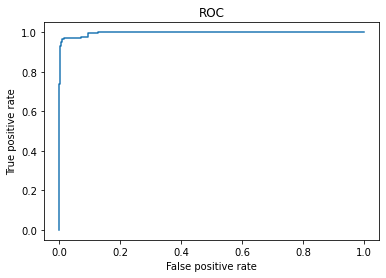

In [53]:
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)